<a href="https://colab.research.google.com/github/msafari18/Intelligent-Analysis-of-Biomedical-Images/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!unzip "/content/drive/My Drive/CT_Scan.zip" -d "/content/sample_data/Dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/sample_data/Dataset/__MACOSX/CT_Scan/LungCT-Diagnosis/R_150/._10-29-1997-Diagnostic Pre-Surgery Contrast Enhanced CT-48002  
  inflating: /content/sample_data/Dataset/__MACOSX/CT_Scan/LungCT-Diagnosis/._R_150  
   creating: /content/sample_data/Dataset/CT_Scan/LungCT-Diagnosis/R_168/
   creating: /content/sample_data/Dataset/CT_Scan/LungCT-Diagnosis/R_168/09-19-1998-Diagnostic Pre-Surgery Contrast Enhanced CT-72187/
   creating: /content/sample_data/Dataset/CT_Scan/LungCT-Diagnosis/R_168/09-19-1998-Diagnostic Pre-Surgery Contrast Enhanced CT-72187/2.000000- NONE -44851/
  inflating: /content/sample_data/Dataset/CT_Scan/LungCT-Diagnosis/R_168/09-19-1998-Diagnostic Pre-Surgery Contrast Enhanced CT-72187/2.000000- NONE -44851/1-42.dcm  
   creating: /content/sample_data/Dataset/__MACOSX/CT_Scan/LungCT-Diagnosis/R_168/
   creating: /content/sample_data/Dataset/__MACOSX/CT_Scan/LungCT-Diagnosis/R_168/09-19-1998-Diagnos

number of sample:  61
R_124
(512, 512, 86)
R_208
(512, 512, 79)
R_078
(512, 512, 87)
R_111
(512, 512, 83)
R_233
(512, 512, 65)
R_077
(512, 512, 49)
R_146
(512, 512, 87)
R_066
(512, 512, 98)
R_210
(512, 512, 108)
R_180
(512, 512, 68)
R_141
(512, 512, 110)
R_175
(512, 512, 62)
R_098
(512, 512, 88)
R_239
(512, 512, 69)
R_053
(512, 512, 104)
R_043
(512, 512, 111)
R_116
(512, 512, 115)
R_117
(512, 512, 78)
R_150
(512, 512, 77)
R_056
(512, 512, 62)
R_013
(512, 512, 67)
R_004
(512, 512, 68)
R_035
(512, 512, 74)
R_193
(512, 512, 59)
R_061
(512, 512, 70)
R_185
(512, 512, 62)
R_126
(512, 512, 71)
R_267
(512, 512, 40)
R_143
(512, 512, 65)
R_172
(512, 512, 24)
R_191
(512, 512, 76)
R_064
(512, 512, 63)
R_170
(512, 512, 63)
R_014
(512, 512, 76)
R_029
(512, 512, 109)
R_093
(512, 512, 65)
R_232
(512, 512, 74)
R_266
(512, 512, 93)
R_144
(512, 512, 93)
R_137
(512, 512, 69)
R_259
(512, 512, 58)
R_273
(512, 512, 62)
R_022
(512, 512, 80)
R_036
(512, 512, 65)
R_065
(512, 512, 69)
R_102
(512, 512, 55)
R_069


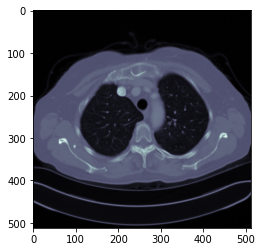

In [33]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
import os
import numpy as np

head = "/content/sample_data/Dataset/CT_Scan/LungCT-Diagnosis/"
array_pepole_ct = os.listdir(head)
print("number of sample: ", len(array_pepole_ct))

dic_files_DCM = {}
for file_name in array_pepole_ct:
  f1 =  os.listdir(head+file_name)[0]
  f2 =  os.listdir(head+file_name+"/"+f1)[0]
  path = head+file_name+"/"+f1+"/"+f2
  temp = []
  for dirName, subdirList, fileList in os.walk(path):
    for filename in fileList:
        if ".dcm" in filename.lower(): 
            temp.append(os.path.join(dirName,filename))
  dic_files_DCM[file_name] = temp

all_sample_dicom = {}
for j in list(dic_files_DCM):
  ct_scan = pydicom.read_file(dic_files_DCM[j][0])  
  ConstPixelDims = (int(ct_scan.Rows), int(ct_scan.Columns), len(dic_files_DCM[j]))
  # print(j)
  # print(ConstPixelDims)
  array_dicom = np.zeros(ConstPixelDims, dtype=ct_scan.pixel_array.dtype)
  for n, i in enumerate(dic_files_DCM[j]):  
    ct_scan = pydicom.read_file(i)  
    array_dicom[:,:,n] = ct_scan.pixel_array
  all_sample_dicom[j] = (array_dicom)

for i in all_sample_dicom:
  print(i)
  print(all_sample_dicom[i].shape)





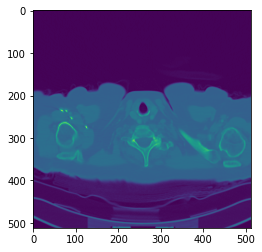

In [37]:
plt.imshow(all_sample_dicom["R_066"][:,:,80])
